! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
from models import *

In [103]:
df = pd.read_csv('dane.data', sep='\t', names=[f'x{i}' for i in range(1, 7)]+['y'])

def partition(df, frac, seed=1234):
    assert 0 < frac < 1
    df_train = df.sample(frac=frac, random_state=seed)
    df_test = df.drop(df_train.index)
    return df_train, df_test

df_train, df_test = partition(df, 6/10)
df_valid, df_test = partition(df_test, 1/2)
print("train: ", df_train.shape)
print("validate: ", df_valid.shape)
print("test: ", df_test.shape)

train:  (1199, 7)
validate:  (400, 7)
test:  (400, 7)


In [104]:
class MinMaxScaler:
    def __init__(self, A):
        self.shift = A.min(axis=0)
        self.factor = A.max(axis=0)-A.min(axis=0)

    def scale(self, A):
        return (A-self.shift)/self.factor

def scale(df, scaler):
    df_scaled = scaler.scale(df.drop('y', axis=1))
    df_scaled['y'] = df['y']
    return df_scaled

scaler = MinMaxScaler(df_train.drop('y', axis=1))
df_train = scale(df_train, scaler)
df_valid = scale(df_valid, scaler)
df_test = scale(df_test, scaler)
df_train.head()

,x1,x2,x3,x4,x5,x6,y
547,0.260870,0.000000,1.0,0.894737,0.444444,0.789474,452.01
593,0.304348,0.103448,0.0,0.526316,0.222222,0.105263,246.09
444,0.217391,0.103448,0.6,0.000000,0.222222,0.368421,551.42
1730,0.869565,0.448276,0.4,0.421053,0.444444,0.578947,179.86
1815,0.913043,0.103448,0.6,0.842105,0.222222,0.789474,17.69


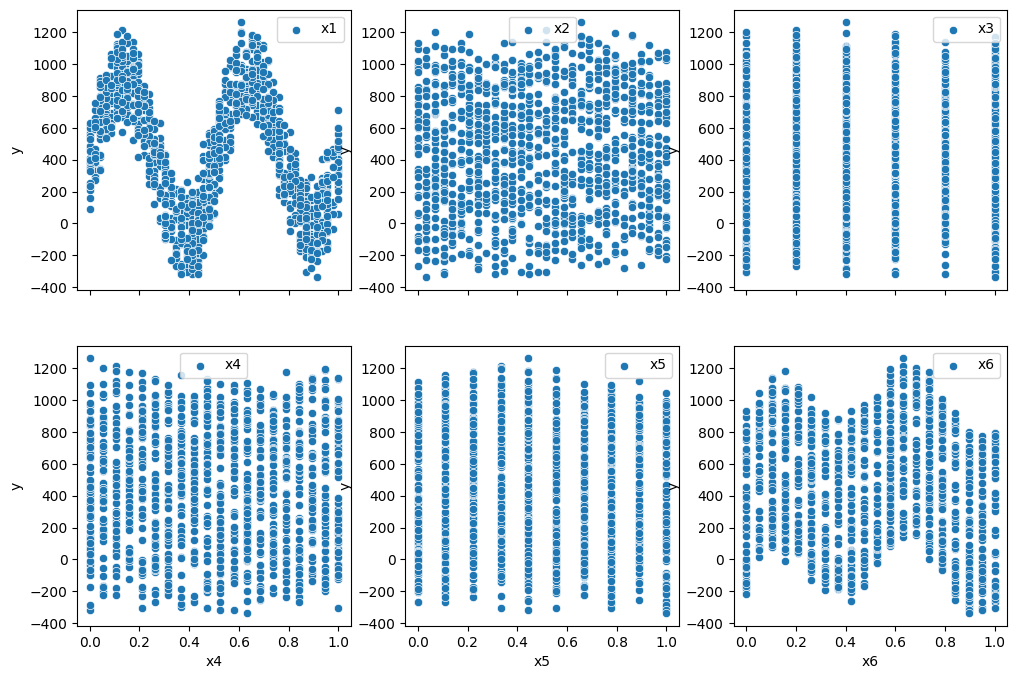

In [105]:
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(12,8))
for y in range(2):
    for x in range(3):
        sns.scatterplot(ax=axes[y, x], data=df_train, x=f'x{x+y*3+1}', y='y', label=f'x{x+y*3+1}')

In [106]:
def add_features(df):
    df['x1_sin'] = np.sin( 4*np.pi* df[f'x1'])
    df['x6_sin'] = np.sin( 4*np.pi* df[f'x6'])
    for i in range(1,7):
        for j in range(2,10):
            df[f'x{i}^{j}']=df[f'x{i}']**j
    for i in range(1,7):
        for j in range(1,i):
            df[f'x{i}*{j}']=df[f'x{i}']*df[f'x{j}']
            
add_features(df_train)
add_features(df_valid)
add_features(df_test)
df_train.head()

,x1,x2,x3,x4,x5,x6,y,x1_sin,x6_sin,x1^2,...,x4*3,x5*1,x5*2,x5*3,x5*4,x6*1,x6*2,x6*3,x6*4,x6*5
547,0.260870,0.000000,1.0,0.894737,0.444444,0.789474,452.01,-0.136167,-0.475947,0.068053,...,0.894737,0.115942,0.000000,0.444444,0.397661,0.205950,0.000000,0.789474,0.706371,0.350877
593,0.304348,0.103448,0.0,0.526316,0.222222,0.105263,246.09,-0.631088,0.969400,0.092628,...,0.000000,0.067633,0.022989,0.000000,0.116959,0.032037,0.010889,0.000000,0.055402,0.023392
444,0.217391,0.103448,0.6,0.000000,0.222222,0.368421,551.42,0.398401,-0.996584,0.047259,...,0.000000,0.048309,0.022989,0.133333,0.000000,0.080092,0.038113,0.221053,0.000000,0.081871
1730,0.869565,0.448276,0.4,0.421053,0.444444,0.578947,179.86,-0.997669,0.837166,0.756144,...,0.168421,0.386473,0.199234,0.177778,0.187135,0.503432,0.259528,0.231579,0.243767,0.257310
1815,0.913043,0.103448,0.6,0.842105,0.222222,0.789474,17.69,-0.887885,-0.475947,0.833648,...,0.505263,0.202899,0.022989,0.133333,0.187135,0.720824,0.081670,0.473684,0.664820,0.175439


In [107]:
def get_data(df):
    y = df['y'].to_numpy()
    y = y.reshape([y.shape[0], 1])

    X = df.drop('y', axis=1)
    X.insert(0, 'x0', [1] * df.shape[0])
    X = X.to_numpy()

    return X, y

train_X, train_y = get_data(df_train)
valid_X, valid_y = get_data(df_valid)
test_X, test_y = get_data(df_test)
print("train: ", train_X.shape)
print("validate: ", valid_X.shape)
print("test: ", test_X.shape)

train:  (1199, 72)
validate:  (400, 72)
test:  (400, 72)


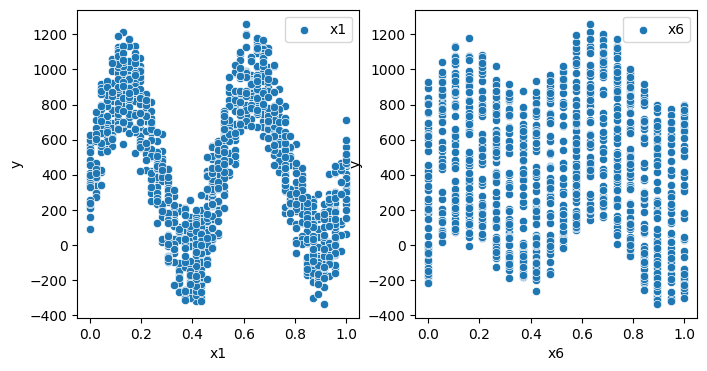

In [82]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
for i, x in enumerate([1,6]):
    sns.scatterplot(ax=axes[i], data=df_train, x=f'x{x}', y='y', label=f'x{x}')

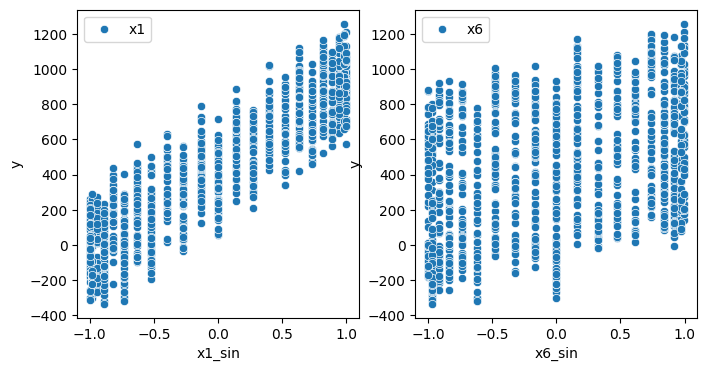

In [83]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
for i, x in enumerate([1,6]):
    sns.scatterplot(ax=axes[i], data=df_train, x=f'x{x}_sin', y='y', label=f'x{x}', )

In [108]:
def plot(model, thetas, X, y, label=''):
    step = len(thetas) // 100
    epochs = [ep for ep in range(0, len(thetas), step)] + [len(thetas)-1]
    loses = [model.mse(y, model.pred(X, theta), theta) for theta in thetas[::step]] + [model.mse(y, model.pred(X, thetas[-1]), thetas[-1])]
    data = {'epoch': epochs[2:], 'loss': loses[2:]}
    sns.lineplot(data=pd.DataFrame(data), x='epoch', y='loss', label=f'{label}: {np.round(loses[-1],2)}')
    
    # px = [int(len(thetas) * x)-1 for x in [0.01, 0.02, 0.03, 0.125, 0.625, 1]]
    # py = [model.mse(y, model.pred(X, thetas[x]), thetas[x]) for x in px]
    # plt.scatter(x=px, y=py)

## Least Squares + No Regularization

In [14]:
ls_model = LeastSquaresModel(train_X, train_y)

In [36]:
%%time
thetas, loss = ls_model.train(500000, step_size=0.25)
# print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])})')
print(f'loss:\t{loss}')

loss:	321.97082984481693
CPU times: user 1min 52s, sys: 412 ms, total: 1min 52s
Wall time: 1min 52s


In [35]:
%%time
ls_model.analytical()
a_theta, a_loss = ls_model.analytical()
# print(f'theta:\t{np.reshape(np.round(a_theta,2), a_theta.shape[0])}')
print(f'loss:\t{a_loss}')

loss:	46.67268742635361
CPU times: user 20.5 ms, sys: 4.75 ms, total: 25.3 ms
Wall time: 2.74 ms


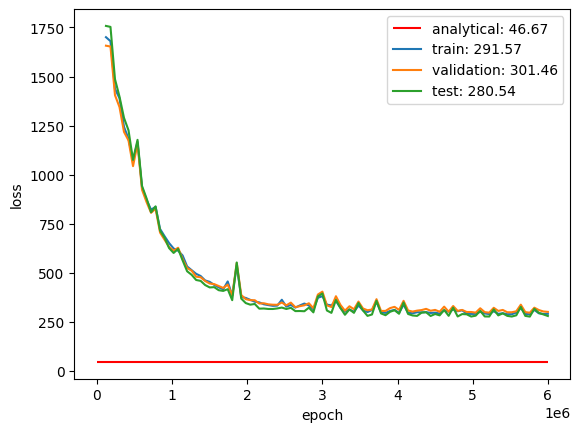

In [40]:
plt.hlines(y=a_loss, xmin=0, xmax=len(thetas)-1, color='red', label=f'analytical: {np.round(a_loss,2)}')
plot(ls_model, thetas, train_X, train_y, label='train')
plot(ls_model, thetas, valid_X, valid_y, label='validation')
plot(ls_model, thetas, test_X, test_y, label='test')

## Least Squares + Ridge Regularization

In [124]:
rls_model = RidgeLSModel(train_X, train_y, 0.000000001)

In [130]:
%%time
thetas, loss = rls_model.train(500000, step_size=0.25)
# print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])})')
print(f'loss:\t{loss}')

loss:	262.45325292601655
CPU times: user 2min 20s, sys: 471 ms, total: 2min 20s
Wall time: 2min 20s


In [131]:
%%time
rls_model.analytical()
a_theta, a_loss = rls_model.analytical()
# print(f'theta:\t{np.reshape(
# np.round(a_theta,2), a_theta.shape[0])}')
print(f'loss:\t{a_loss}')

loss:	947.1079183515436
CPU times: user 9.69 ms, sys: 48.1 ms, total: 57.8 ms
Wall time: 10.6 ms


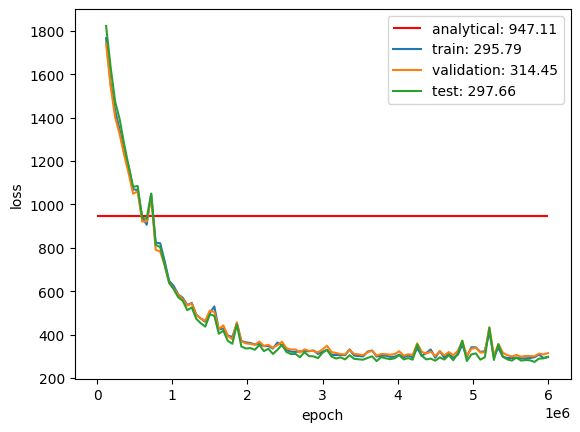

In [132]:
plt.hlines(y=a_loss, xmin=0, xmax=len(thetas)-1, color='red', label=f'analytical: {np.round(a_loss,2)}')
plot(rls_model, thetas, train_X, train_y, label='train')
plot(rls_model, thetas, valid_X, valid_y, label='validation')
plot(rls_model, thetas, test_X, test_y, label='test')

## Least Squares + Lasso Regularization

In [64]:
lls_model = LassoLSModel(train_X, train_y, 0.000001)

In [65]:
%%time
thetas, loss = lls_model.train(500000, step_size=0.25)
# print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])})')
print(f'loss:\t{loss}')

loss:	256.322372513923
CPU times: user 2min 26s, sys: 1.23 s, total: 2min 28s
Wall time: 2min 29s


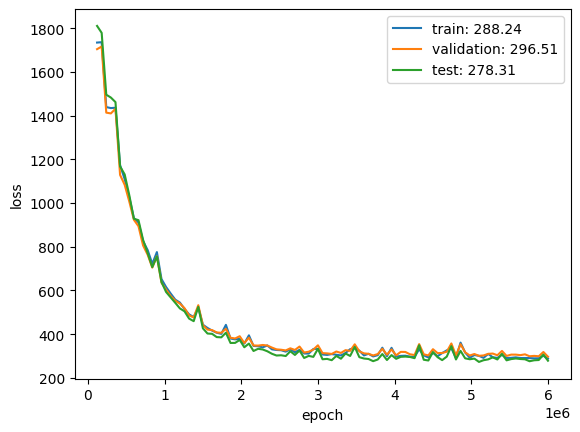

In [66]:
plot(lls_model, thetas, train_X, train_y, label='train')
plot(lls_model, thetas, valid_X, valid_y, label='validation')
plot(lls_model, thetas, test_X, test_y, label='test')

## Elastic Net

In [133]:
els_model = ElasticLSModel(train_X, train_y, 0.000001, 0.000000001)

In [135]:
%%time
thetas, loss = els_model.train(500000, step_size=0.25)
# print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])})')
print(f'loss:\t{loss}')

loss:	278.3478993890484
CPU times: user 3min 1s, sys: 1.49 s, total: 3min 2s
Wall time: 3min 4s


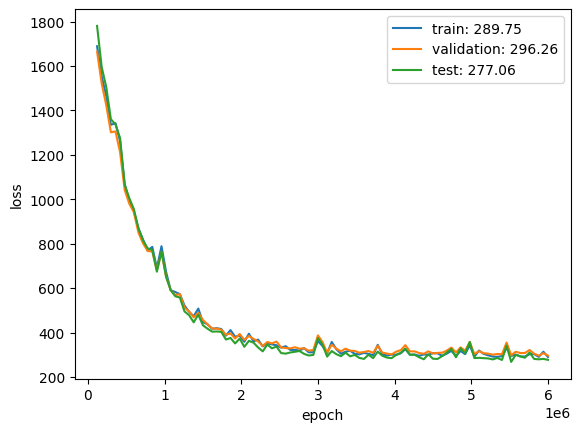

In [136]:
plot(els_model, thetas, train_X, train_y, label='train')
plot(els_model, thetas, valid_X, valid_y, label='validation')
plot(els_model, thetas, test_X, test_y, label='test')